In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [12]:
data=pd.read_csv('after_clean.csv')
data.head()

,Unnamed: 0,Year,Jurisdiction,Gender,Average scale score
0,0,2022,National,Male,239.0
1,1,2022,National,Female,233.0
2,2,2022,Alabama,Male,233.0
3,3,2022,Alabama,Female,228.0
4,4,2022,Alaska,Male,224.0


In [13]:
# find out teh jurisdiction 
states=data['Jurisdiction'].unique()
print(len(states))
print(states)

51
['National' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho'
 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [14]:
# 5 states as a group for better plotting
states_1 = data['Jurisdiction'].unique()[:5]
states_2 = data['Jurisdiction'].unique()[5:10]
states_3 = data['Jurisdiction'].unique()[10:15]
states_4 = data['Jurisdiction'].unique()[15:20]
states_5 = data['Jurisdiction'].unique()[20:25]
states_6 = data['Jurisdiction'].unique()[25:30]
states_7 = data['Jurisdiction'].unique()[30:35]
states_8 = data['Jurisdiction'].unique()[35:40]
states_9 = data['Jurisdiction'].unique()[40:45]
states_10 = data['Jurisdiction'].unique()[45:]



In [15]:
# Pivot the data for plotting
pivot_data = data.pivot_table(index='Year', columns=['Jurisdiction', 'Gender'], values='Average scale score')

In [16]:
pivot_data.to_csv('pivot_data.csv')

In [17]:
pivot_data

Jurisdiction Alabama        Alaska        Arizona        Arkansas         \
Gender        Female   Male Female   Male  Female   Male   Female   Male   
Year                                                                       
2000           219.0  216.5  225.0  228.0   218.5  219.5    216.5  216.5   
2003           223.0  223.0  231.0  235.0   227.0  231.0    230.0  228.0   
2005           225.0  225.0  235.0  236.0   227.0  233.0    235.0  236.0   
2007           228.0  229.0  237.0  238.0   230.0  233.0    237.0  238.0   
2009           228.0  228.0  236.0  238.0   230.0  230.0    236.0  239.0   
2011           232.0  231.0  235.0  237.0   234.0  237.0    238.0  238.0   
2013           232.0  233.0  236.0  237.0   240.0  240.0    240.0  239.0   
2015           231.0  231.0  235.0  238.0   236.0  239.0    235.0  235.0   
2017           232.0  232.0  230.0  230.0   233.0  236.0    233.0  235.0   
2019           230.0  229.0  232.0  233.0   235.0  240.0    232.0  235.0   
2022           228.0  233.0  228.0  224.0   229.0  235.0    227.0  230.0   

Jurisdiction California         ... Virginia        Washington         \
Gender           Female   Male  ...   Female   Male     Female   Male   
Year                            ...                                     
2000              213.5  212.5  ...    227.5  232.5      225.0  228.0   
2003              225.0  229.0  ...    239.0  240.0      237.0  240.0   
2005              229.0  231.0  ...    239.0  242.0      241.0  242.0   
2007              229.0  231.0  ...    242.0  245.0      241.0  244.0   
2009              231.0  233.0  ...    241.0  245.0      242.0  242.0   
2011              234.0  235.0  ...    244.0  247.0      242.0  244.0   
2013              232.0  235.0  ...    246.0  247.0      246.0  247.0   
2015              230.0  233.0  ...    246.0  247.0      245.0  245.0   
2017              231.0  233.0  ...    245.0  250.0      240.0  243.0   
2019              233.0  236.0  ...    245.0  248.0      237.0  242.0   
2022              227.0  234.0  ...    233.0  239.0      233.0  237.0   

Jurisdiction West Virginia        Wisconsin        Wyoming         
Gender              Female   Male    Female   Male  Female   Male  
Year                                                               
2000                 223.0  225.0     225.0  228.0   227.5  230.0  
2003                 230.0  232.0     235.0  238.0   240.0  242.0  
2005                 229.0  232.0     239.0  242.0   242.0  244.0  
2007                 235.0  238.0     243.0  245.0   243.0  244.0  
2009                 232.0  234.0     242.0  245.0   241.0  243.0  
2011                 234.0  235.0     244.0  245.0   243.0  245.0  
2013                 237.0  238.0     244.0  245.0   246.0  247.0  
2015                 236.0  235.0     243.0  244.0   246.0  248.0  
2017                 236.0  237.0     239.0  242.0   246.0  249.0  
2019                 232.0  231.0     240.0  243.0   244.0  248.0  
2022                 225.0  227.0     238.0  242.0   241.0  246.0  

[11 rows x 102 columns]

In [18]:
def plot(sample_states):
    fig, axes = plt.subplots(nrows=1, ncols=len(sample_states), figsize=(5 * len(sample_states), 10), sharey=True)
    fig.suptitle('Average Mathematics Score By Gender Over Time for Selected States', fontsize=16)
    colors=['#C497B2','#14517C']
    y_min,y_max=200,250
# Loop through the states to create horizontal subplots
    for ax, state in zip(axes, sample_states):
        pivot_data[state].plot(ax=ax, marker='o',color=colors)
        ax.set_title(state)
        ax.set_xlabel('Year')
        ax.set_ylabel('Average Scale Score')
        ax.set_ylim(y_min,y_max)
        ax.legend(title='Gender')

# Adjust the layout
    plt.style.use('my_style')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
findfont: Generic family 'sans-serif' not found because none of the following families were found: ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
findfont: Generic family 'sans-serif' not found because none of the following families were found: ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
findfont: Generic family 'sans-serif' not found because none of the following families were found: ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
findfont: Generic family 'sans-serif' not found because none of the following families were found: ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
findfont: Generic family 'sans-serif' not found because none of the following families were found: [

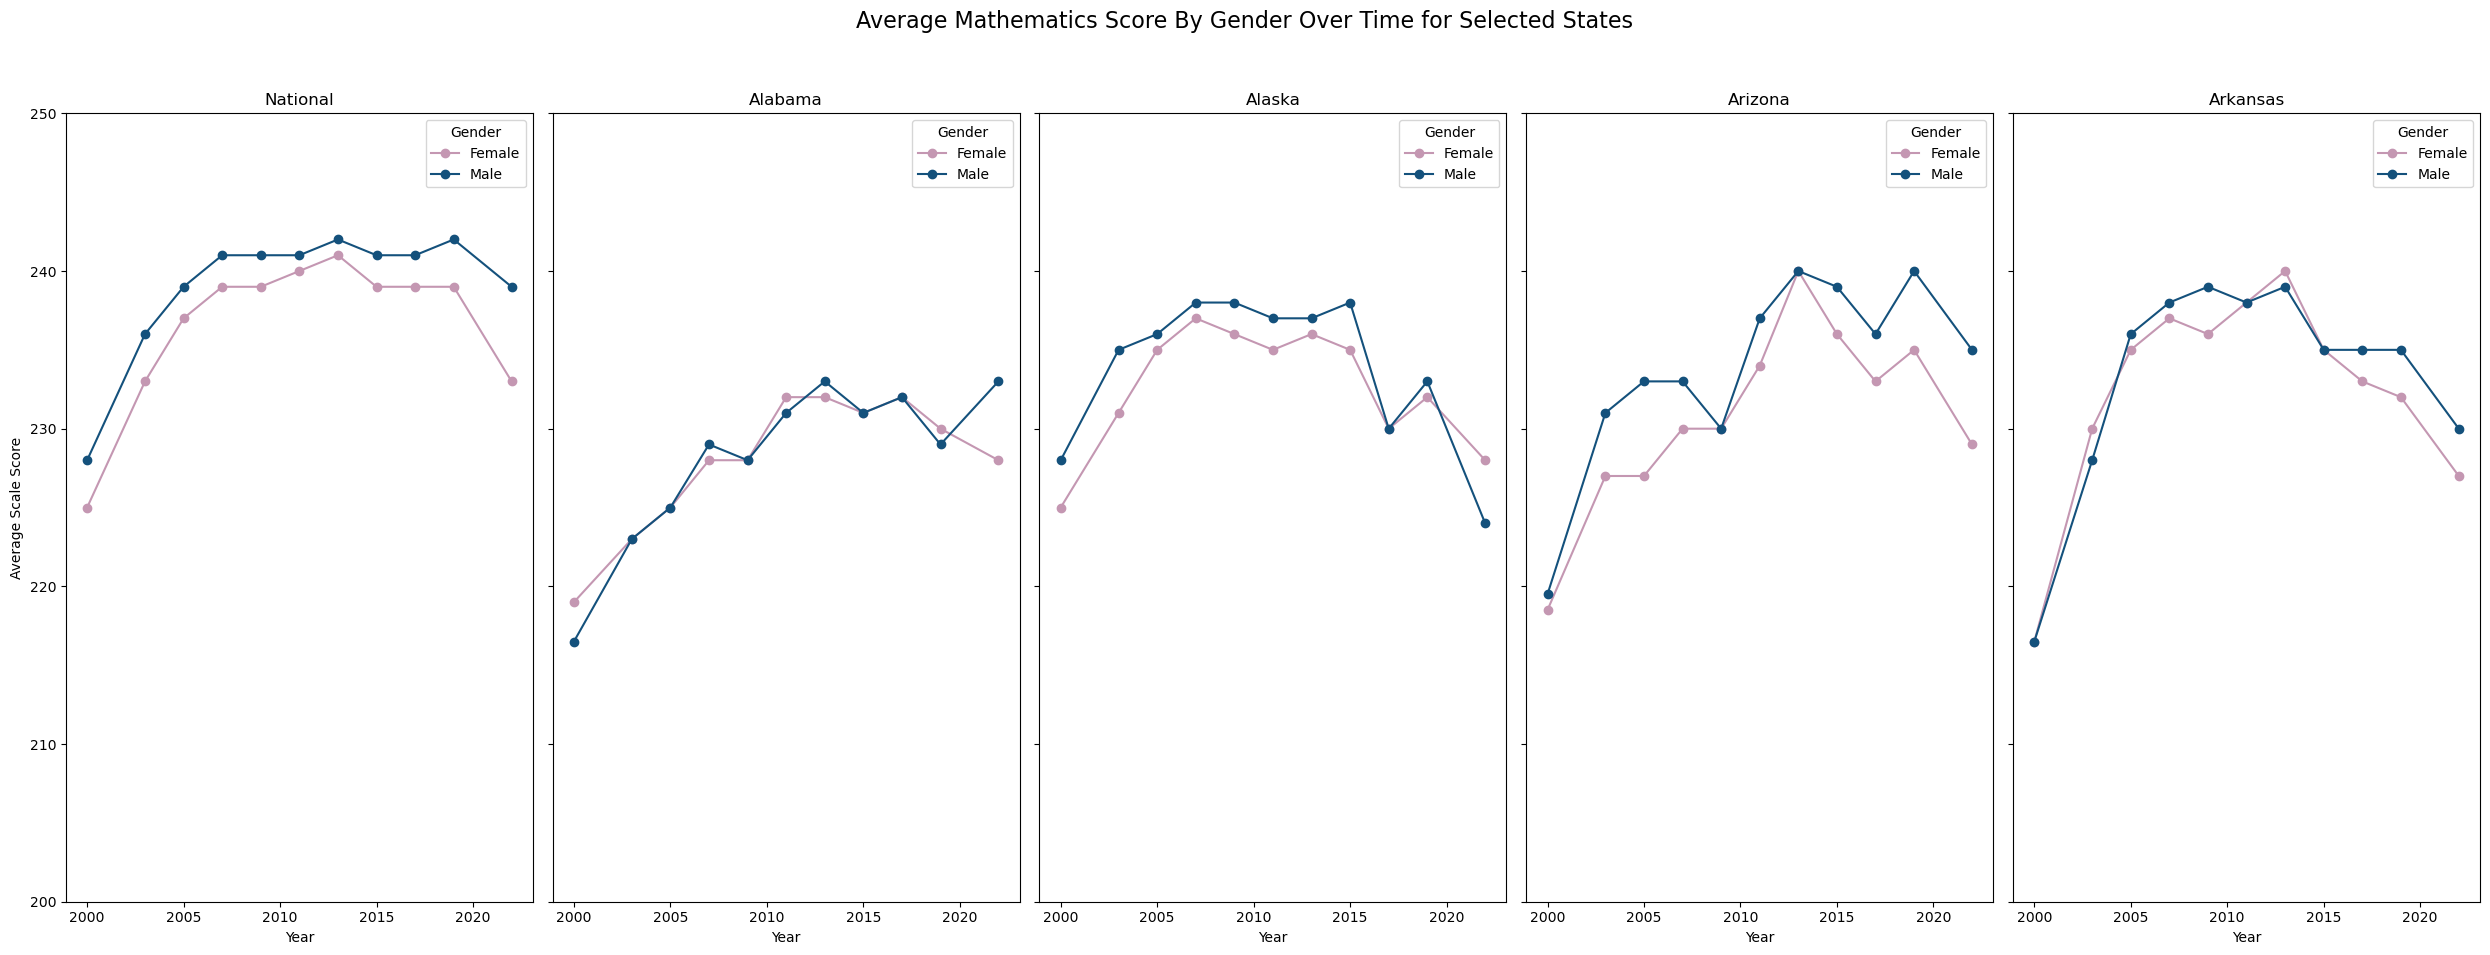

In [19]:
plot(states_1)

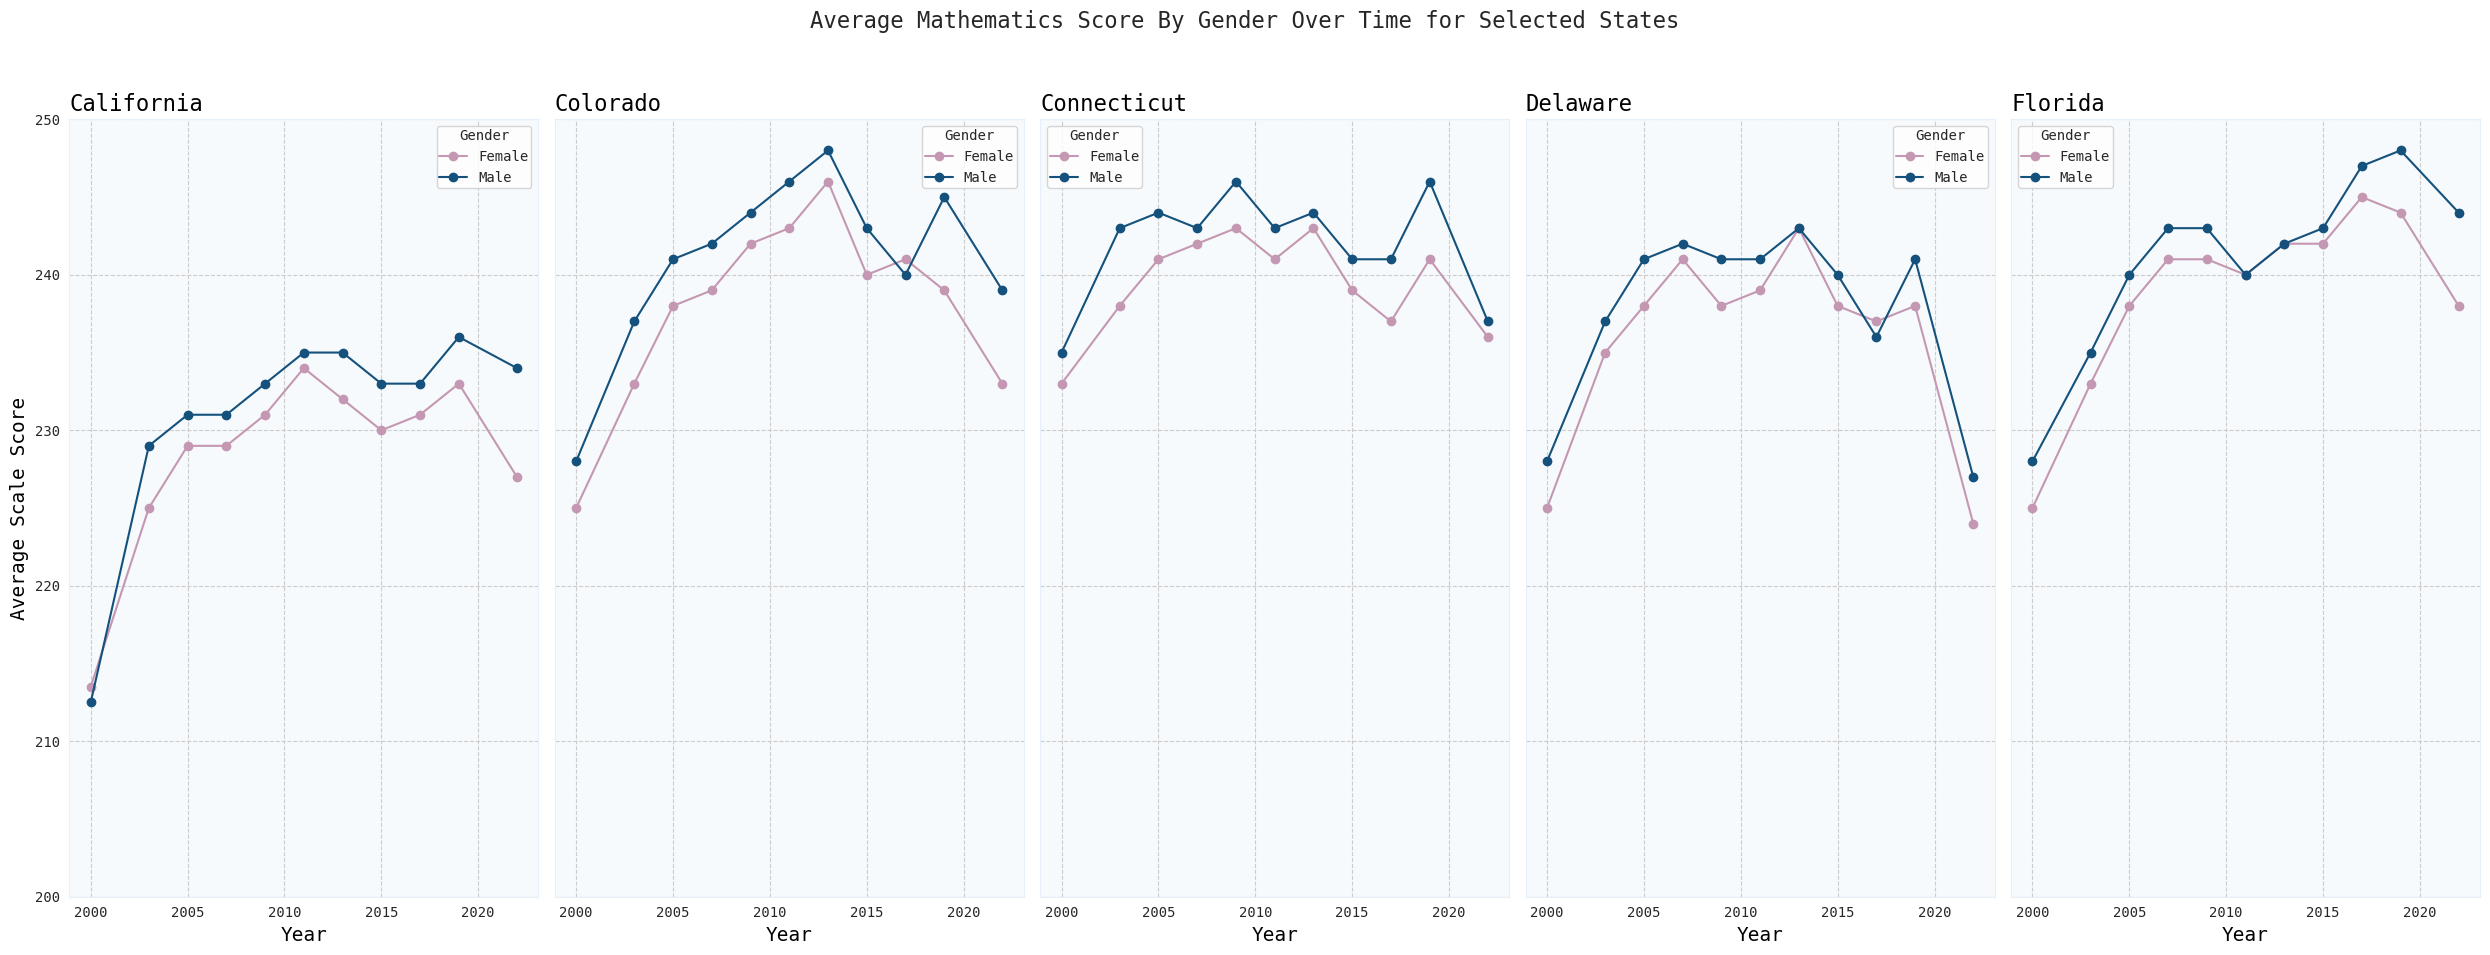

In [20]:
plot(states_2)

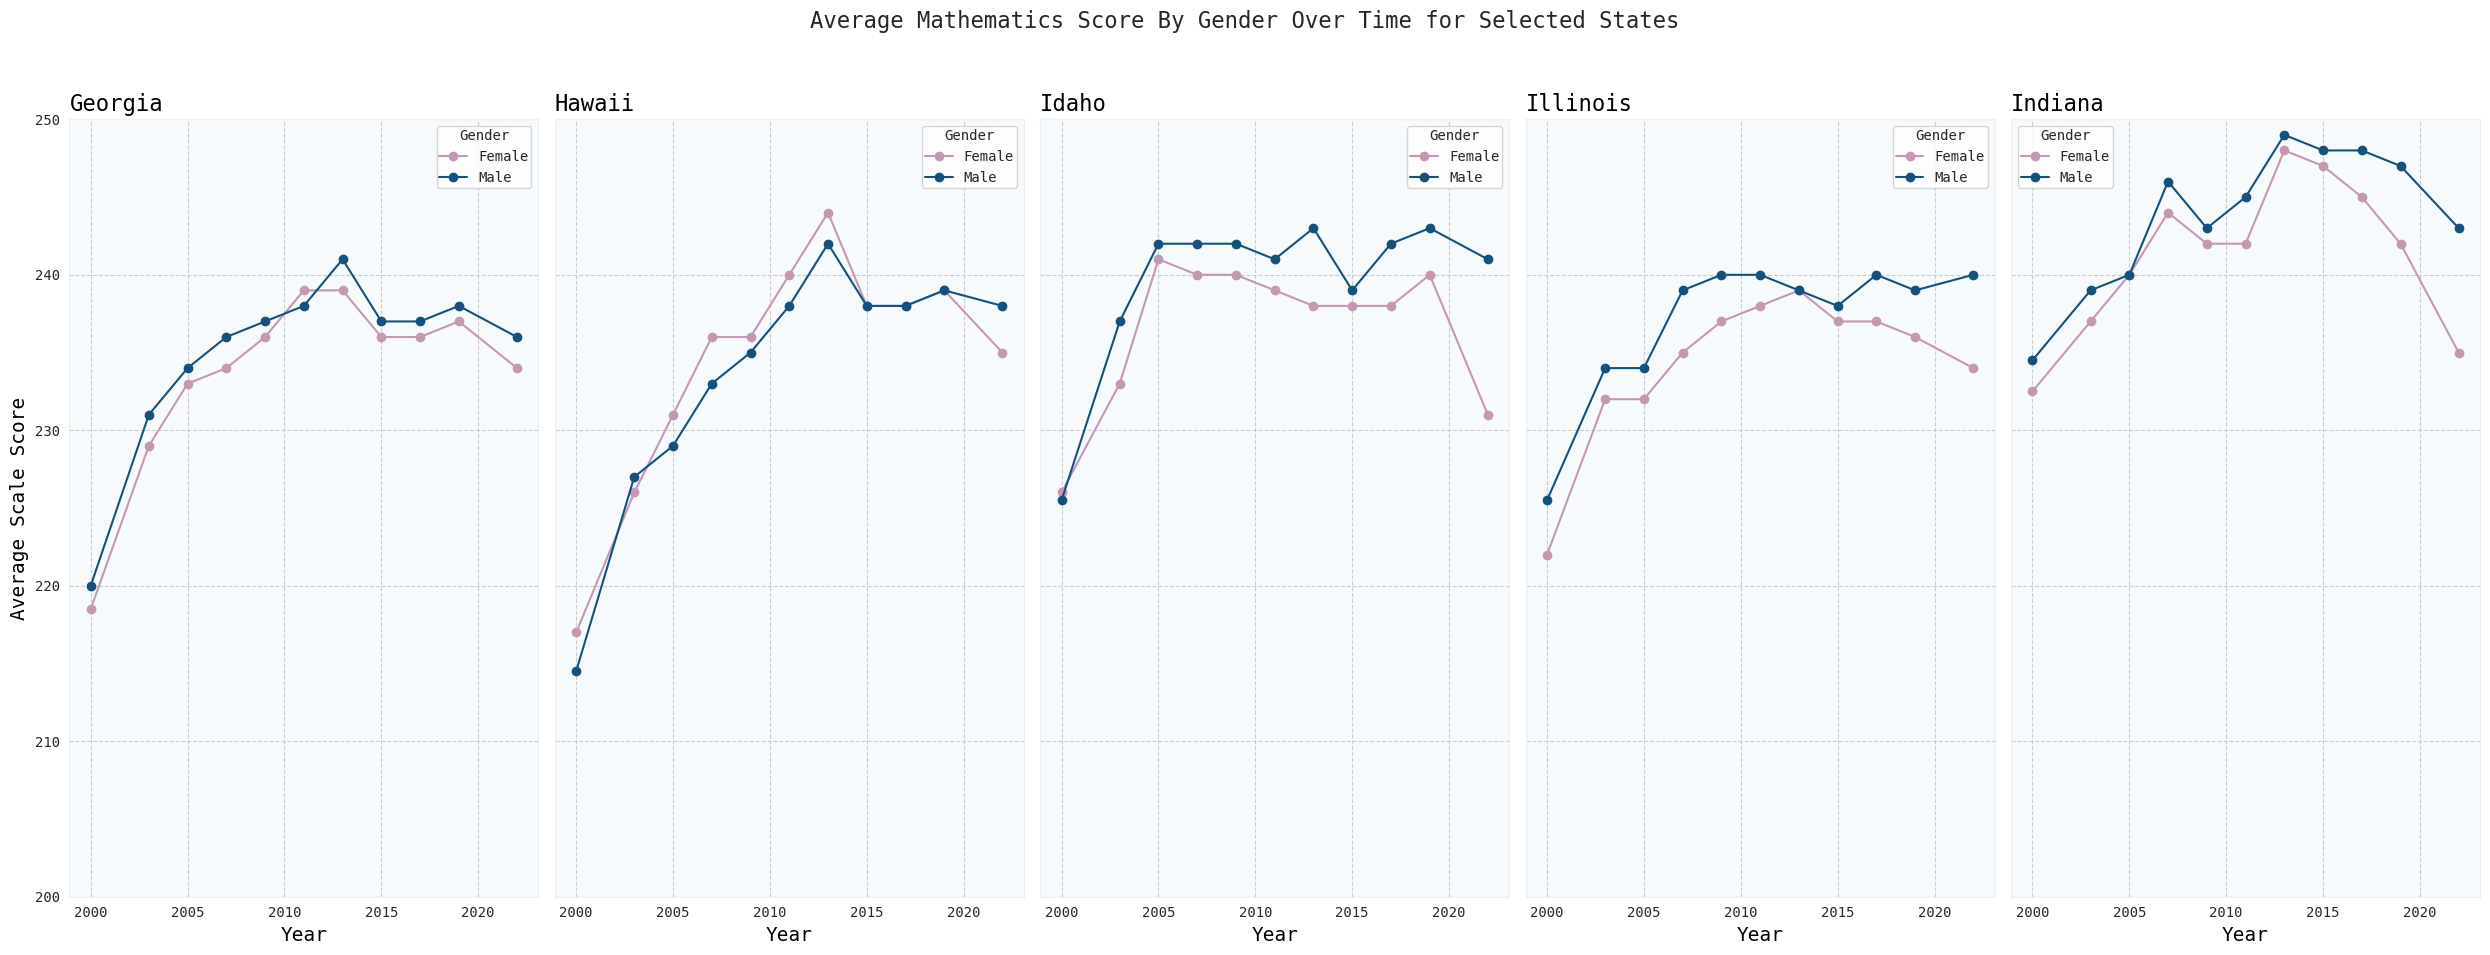

In [21]:
plot(states_3)

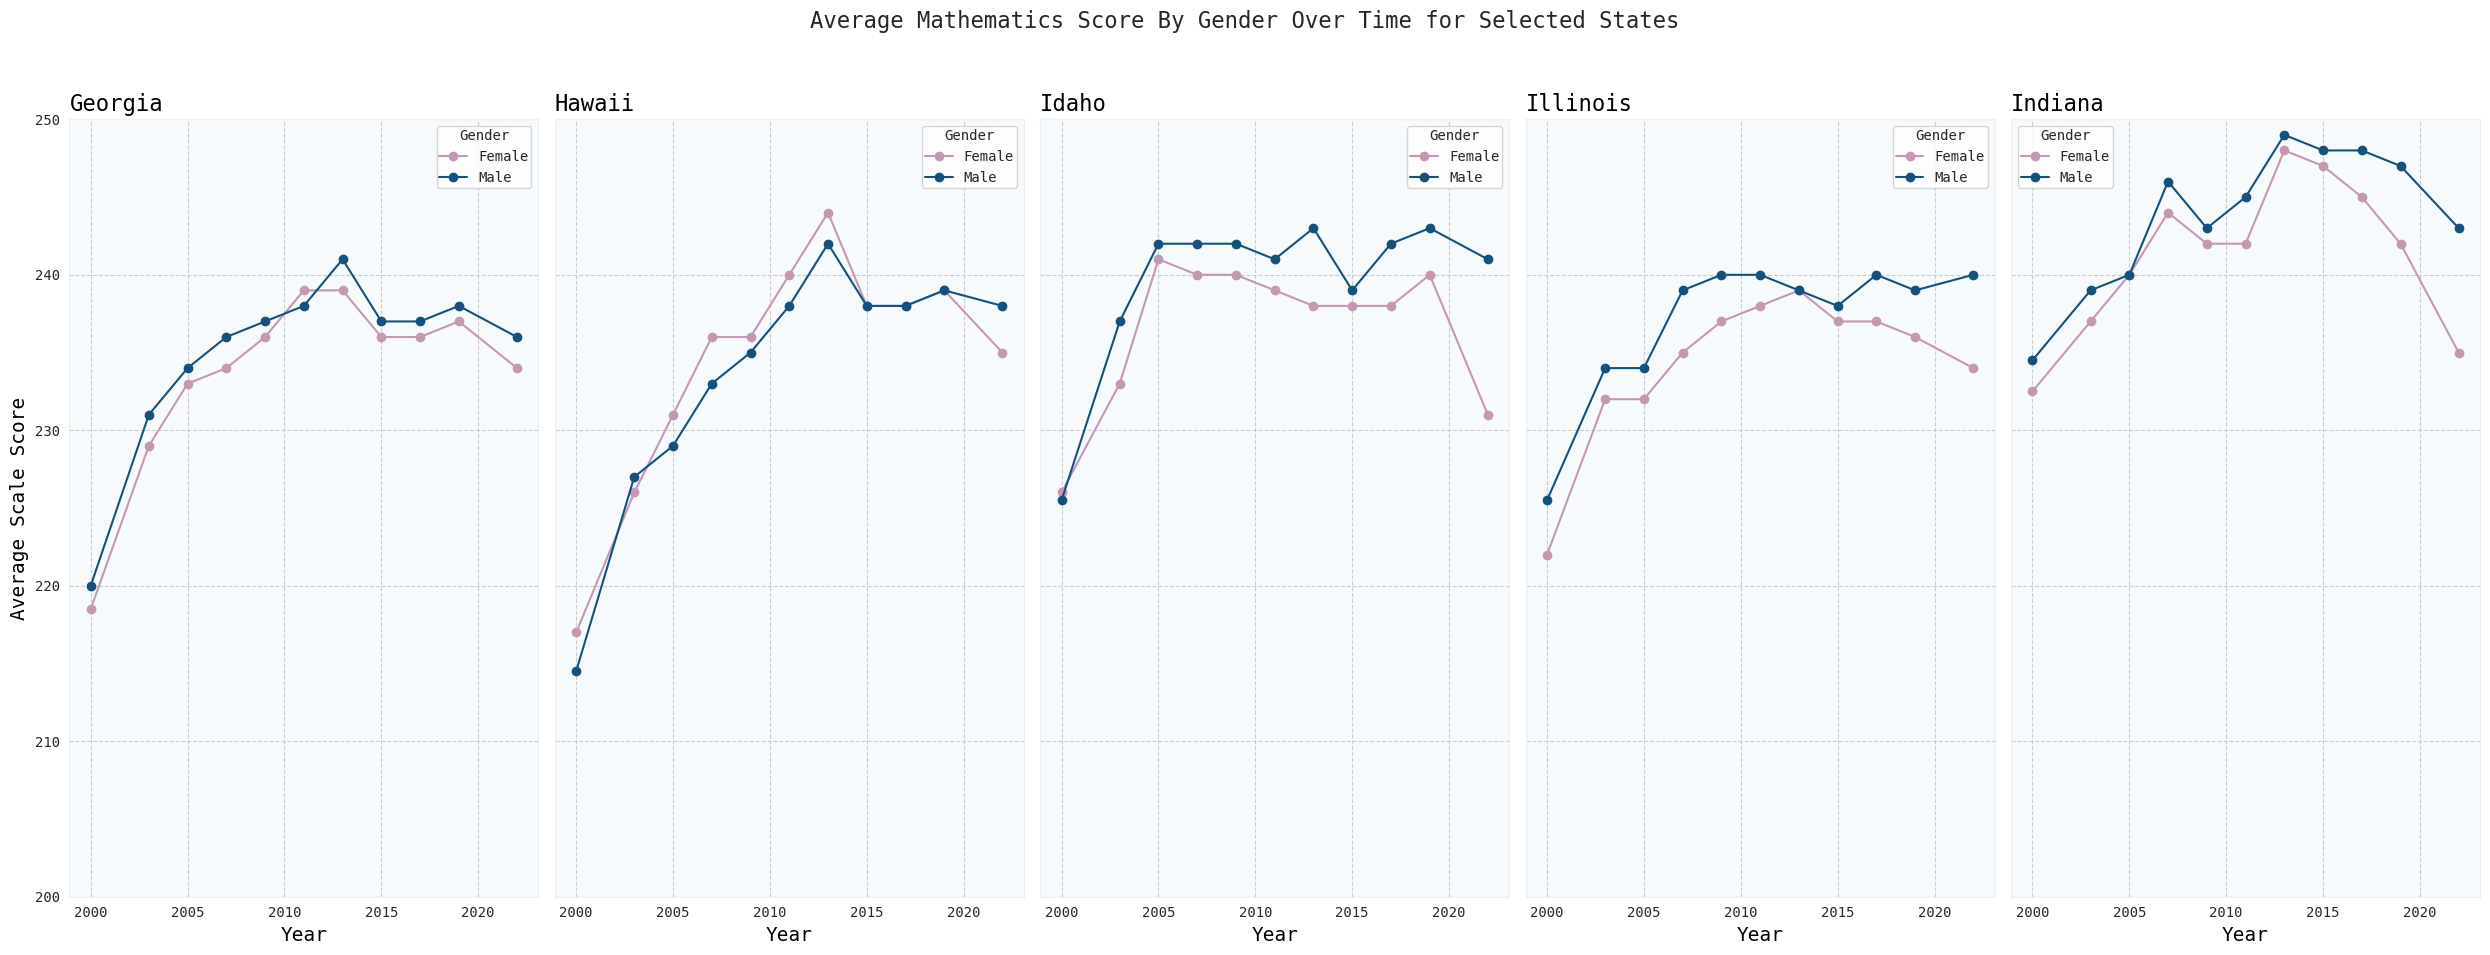

In [22]:
plot(states_3)

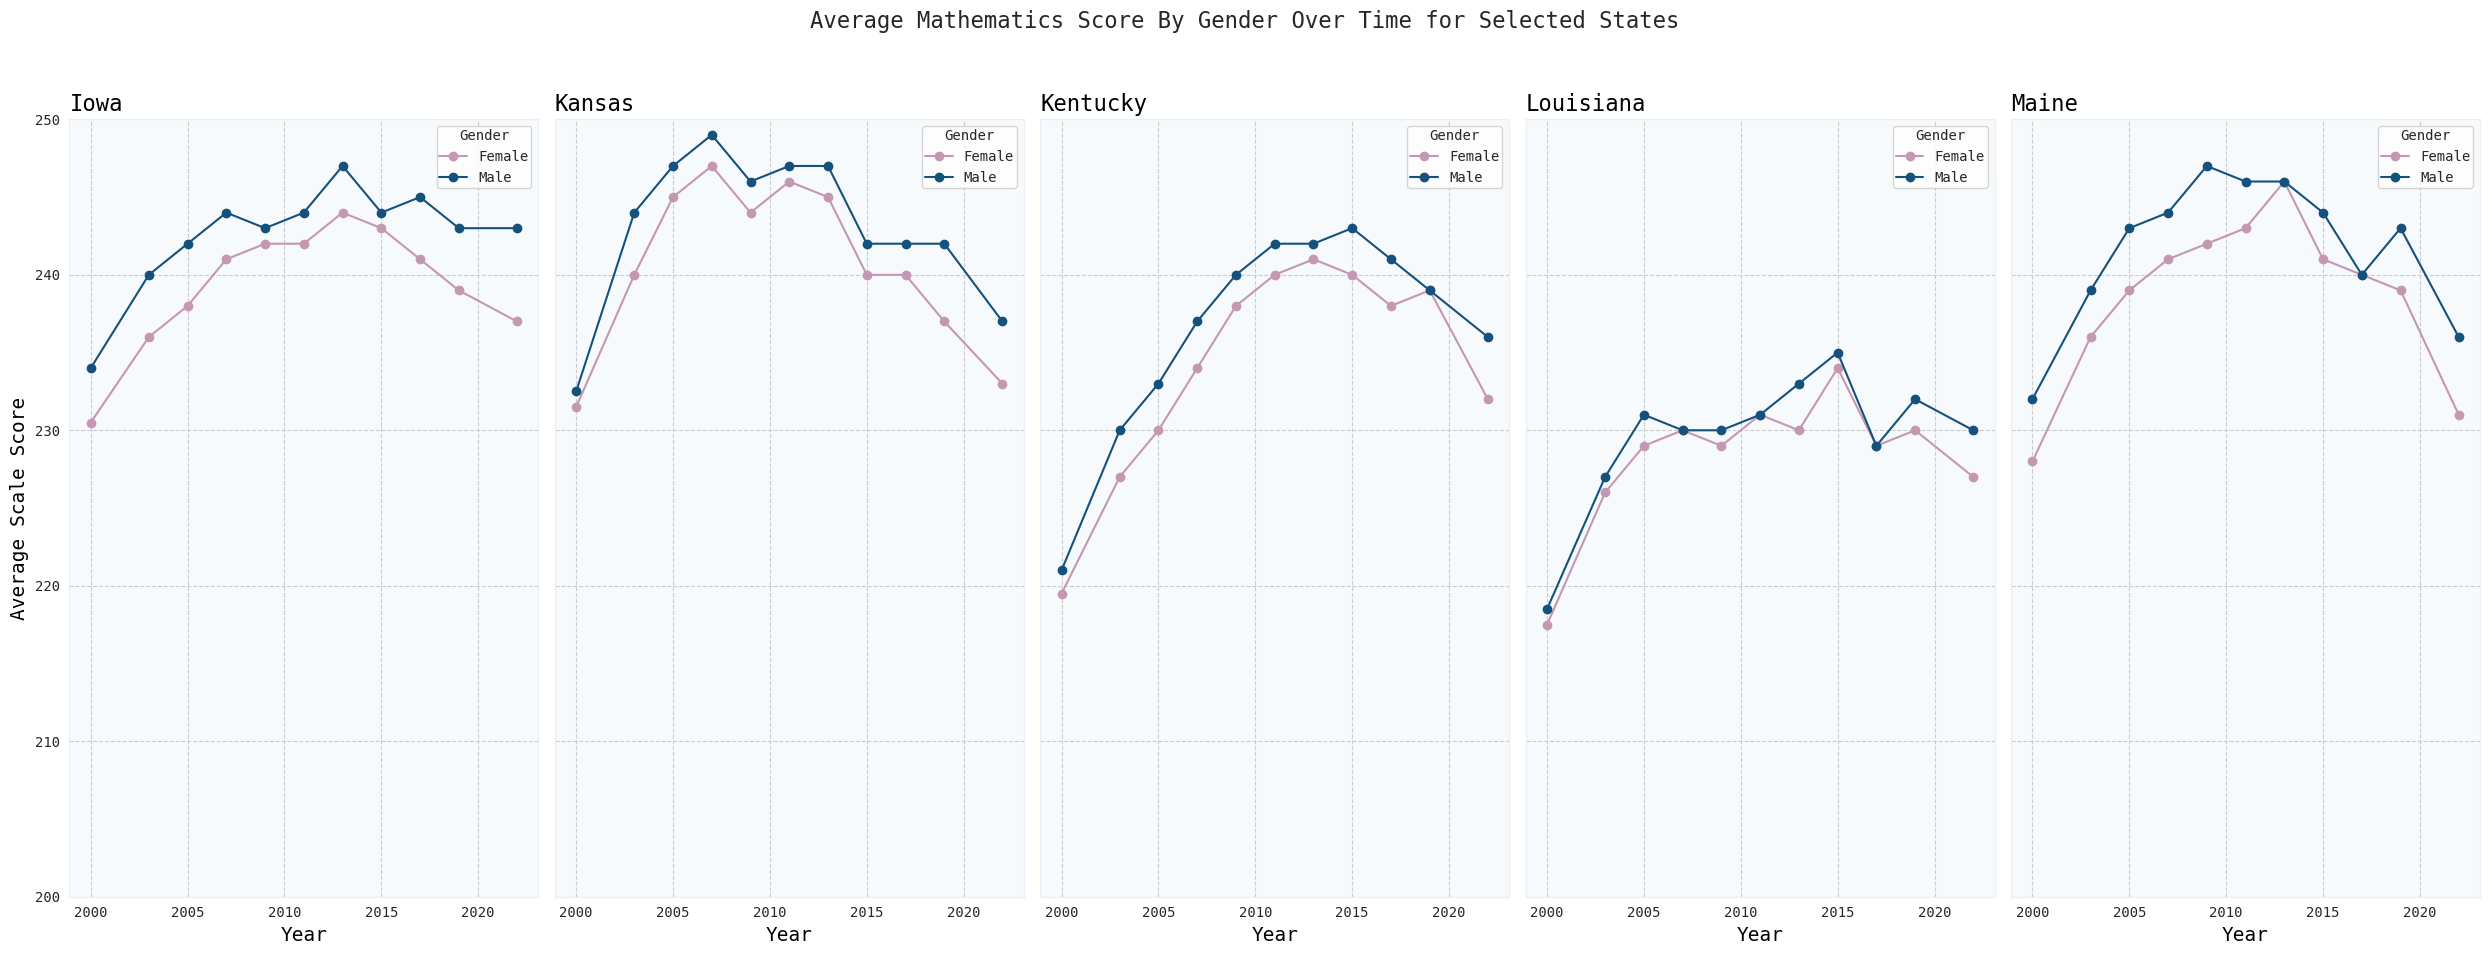

In [23]:
plot(states_4)

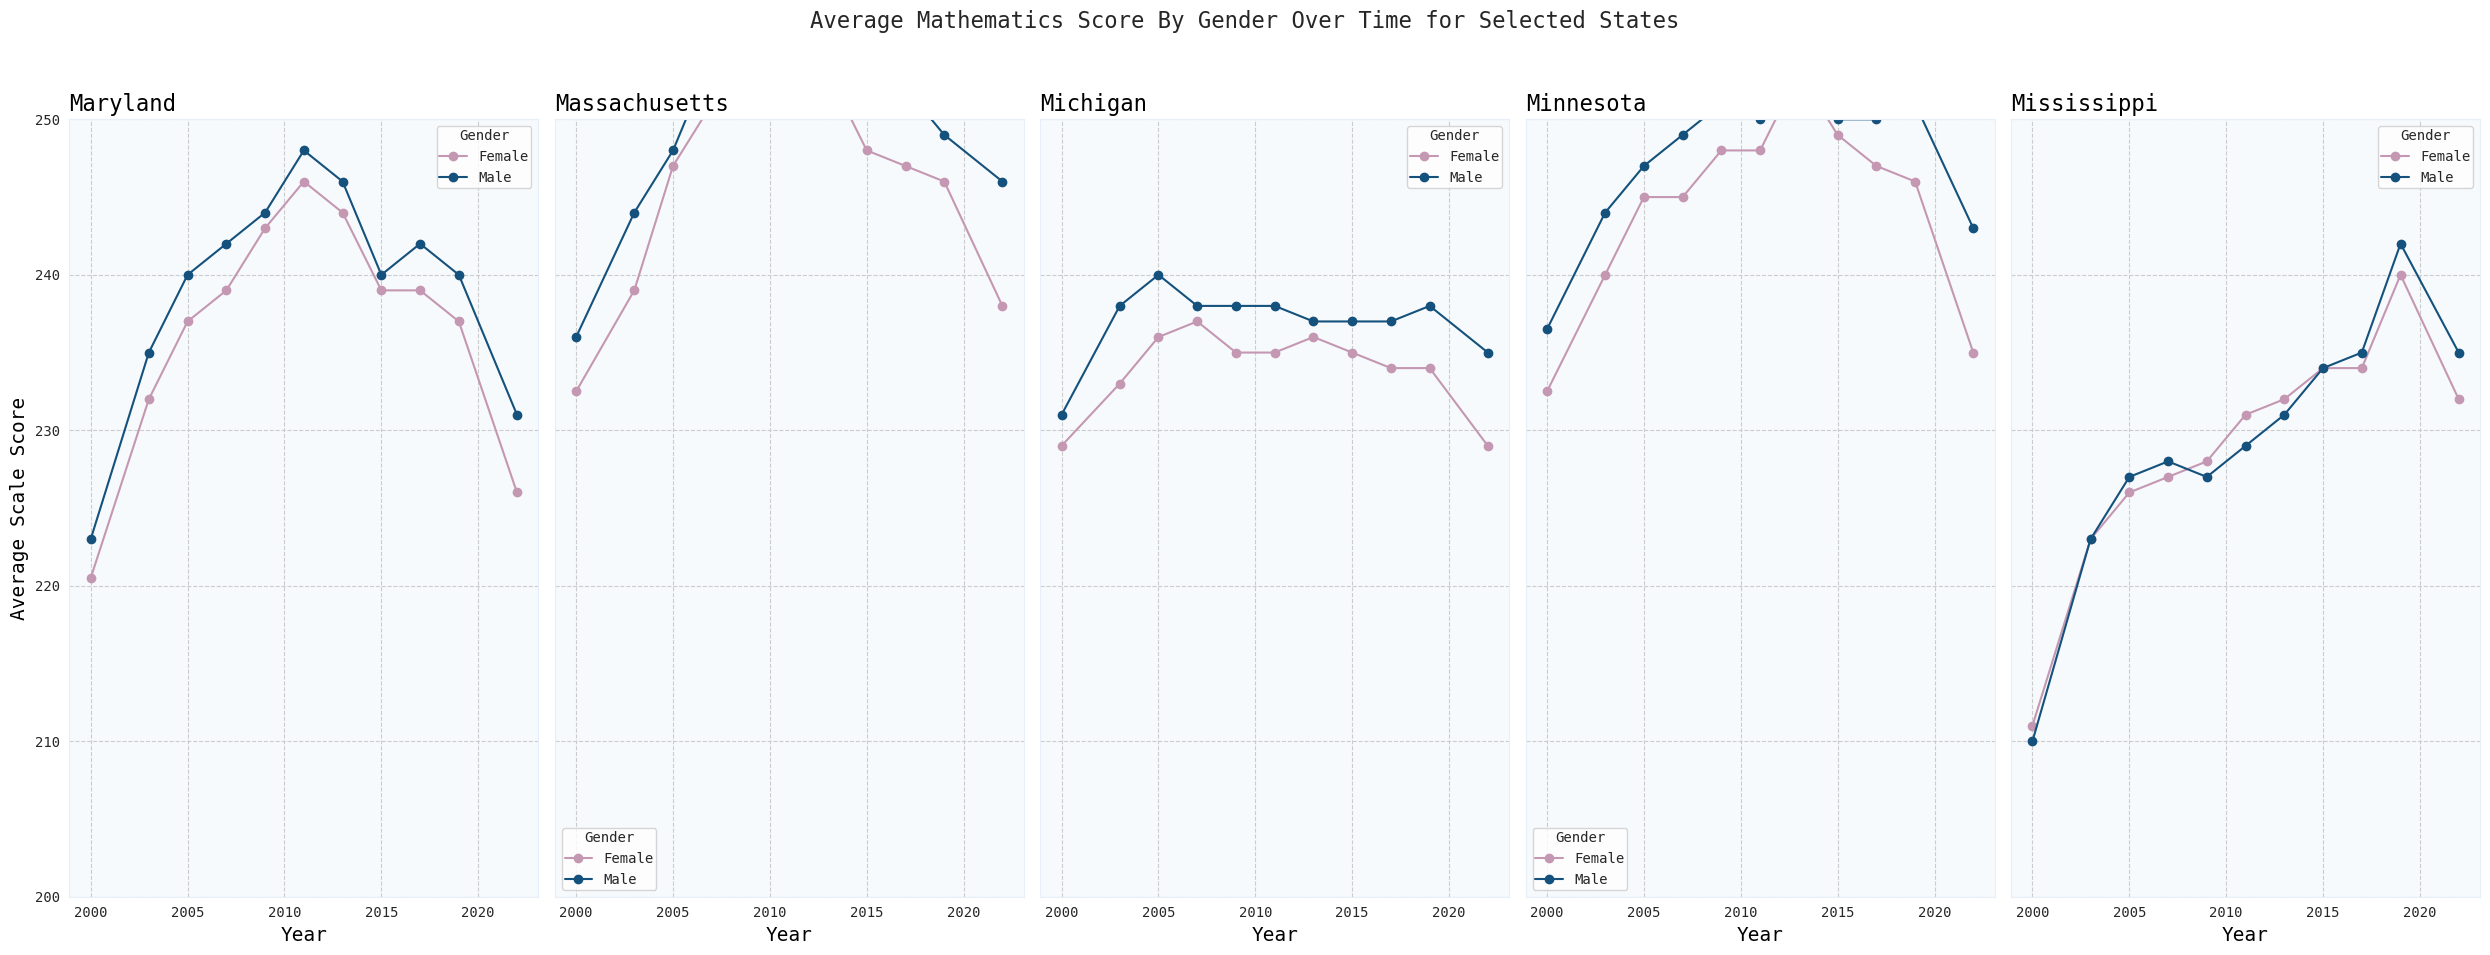

In [24]:
plot(states_5)

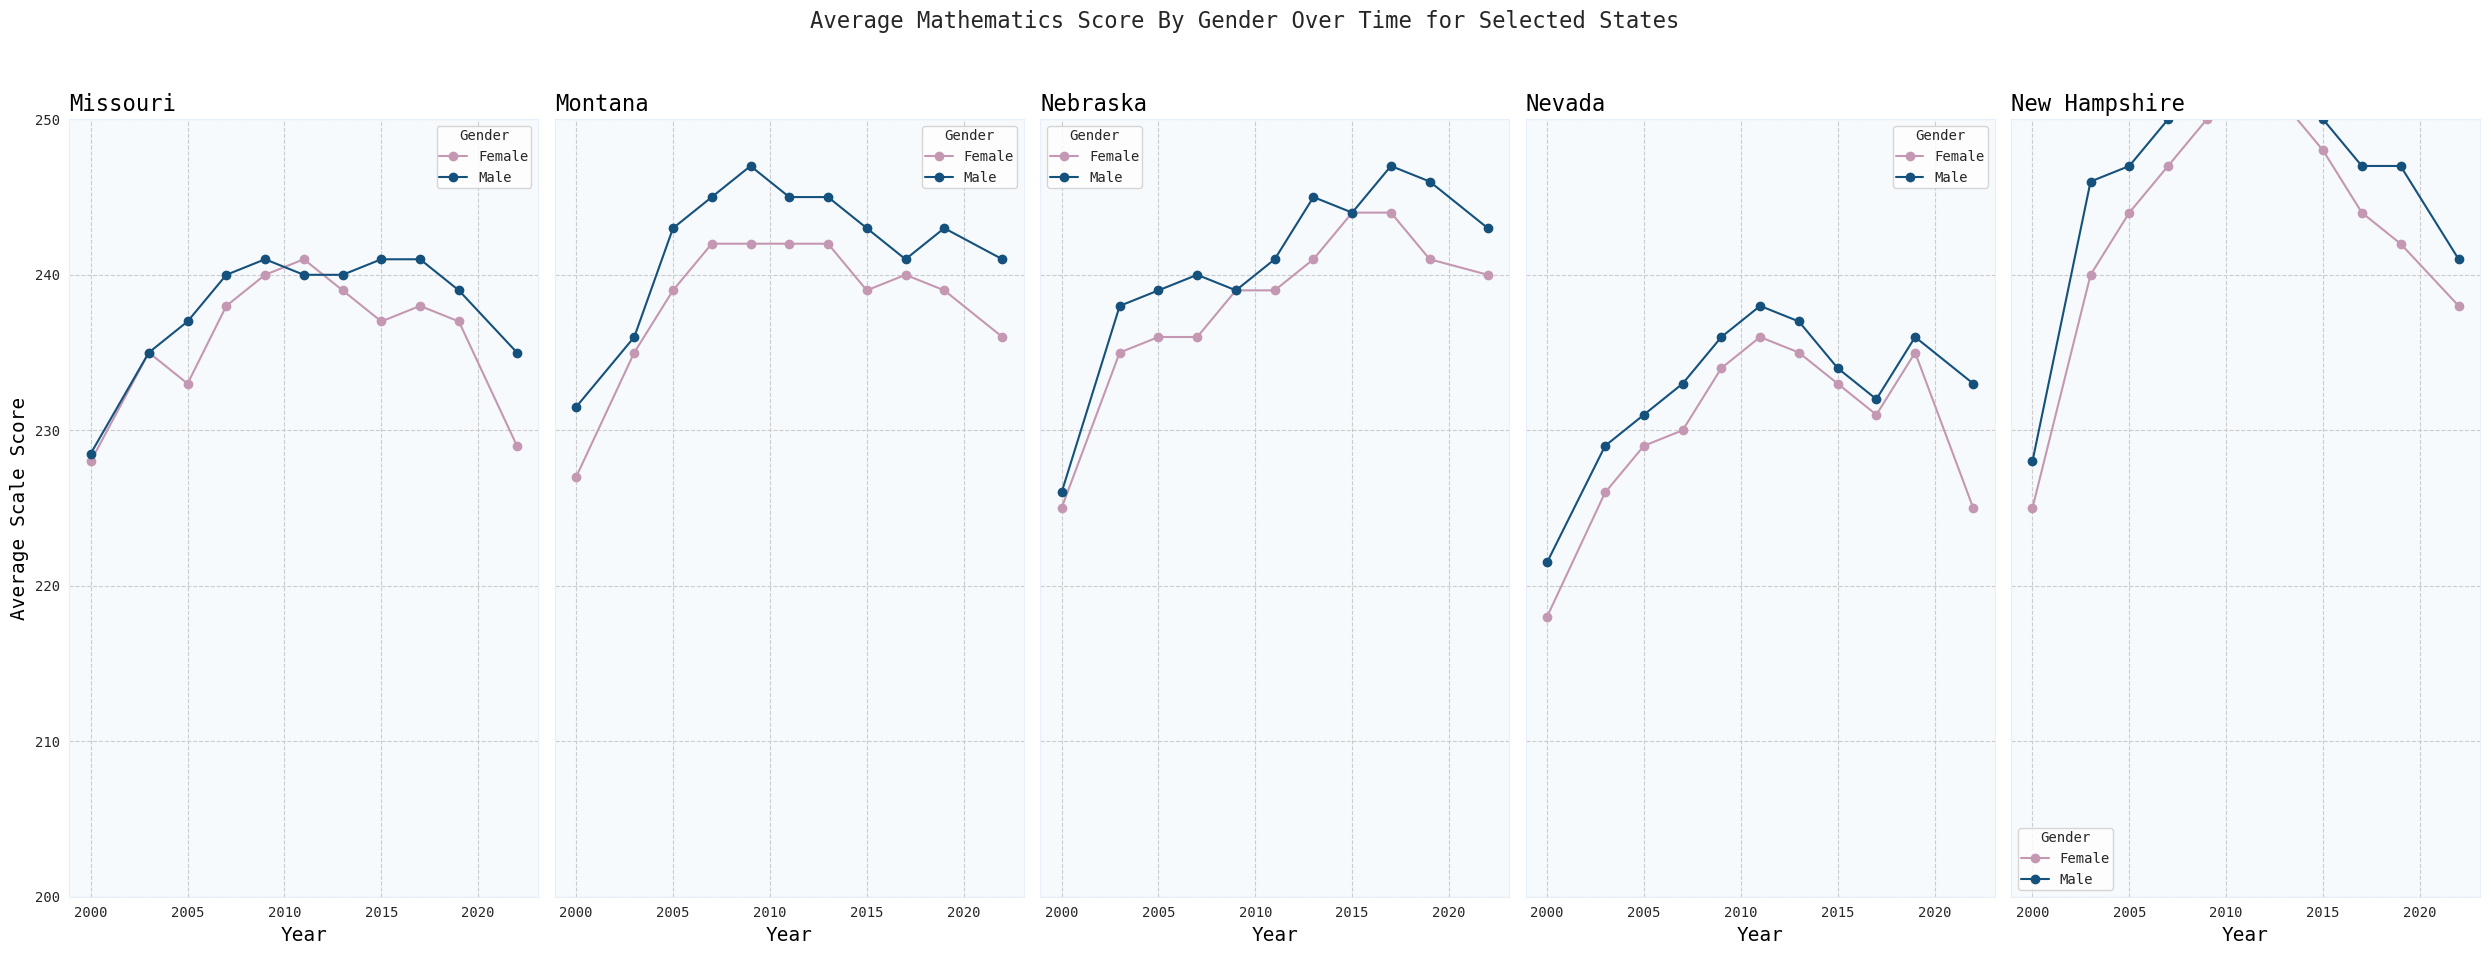

In [25]:
plot(states_6)

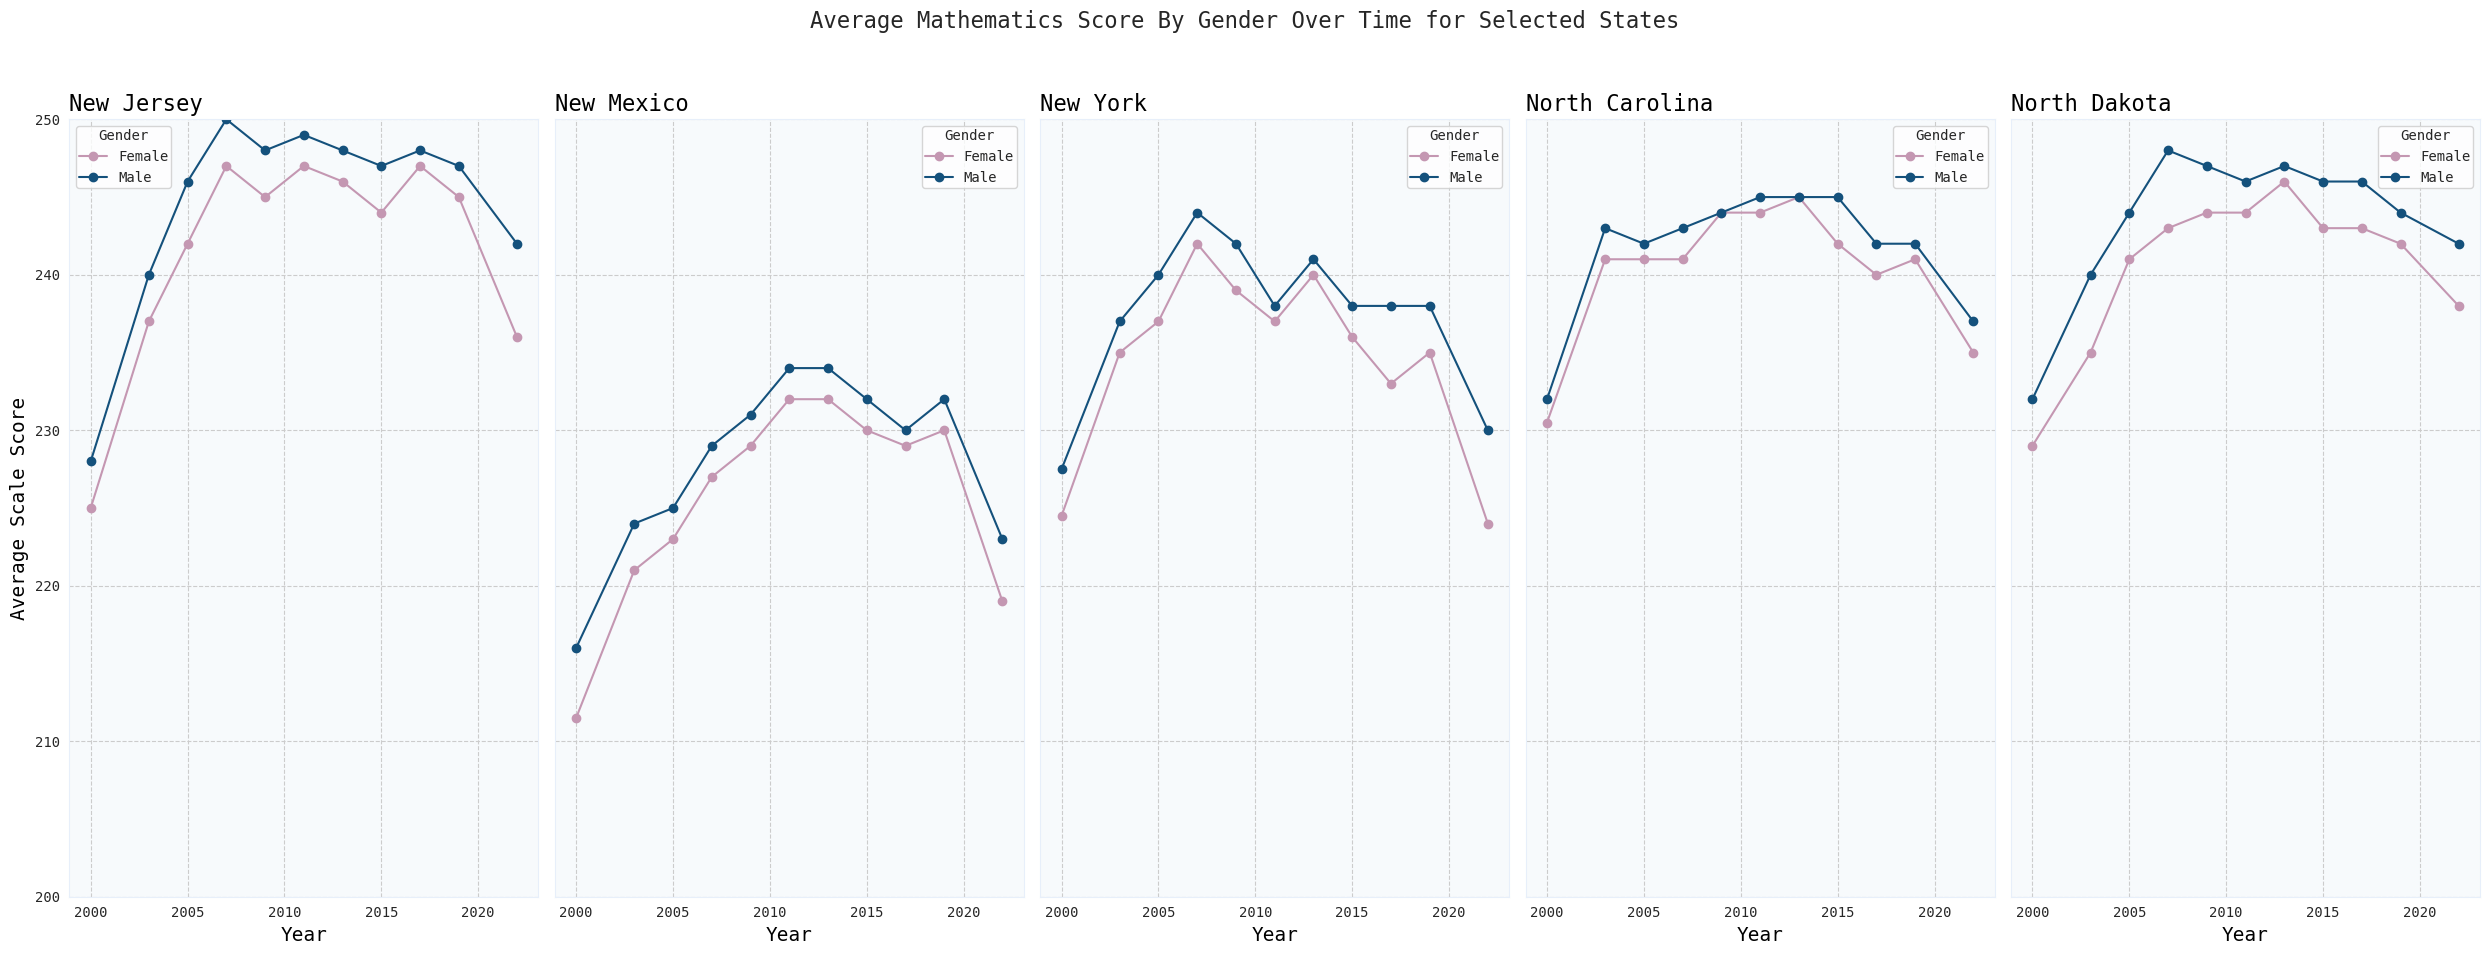

In [26]:
plot(states_7)

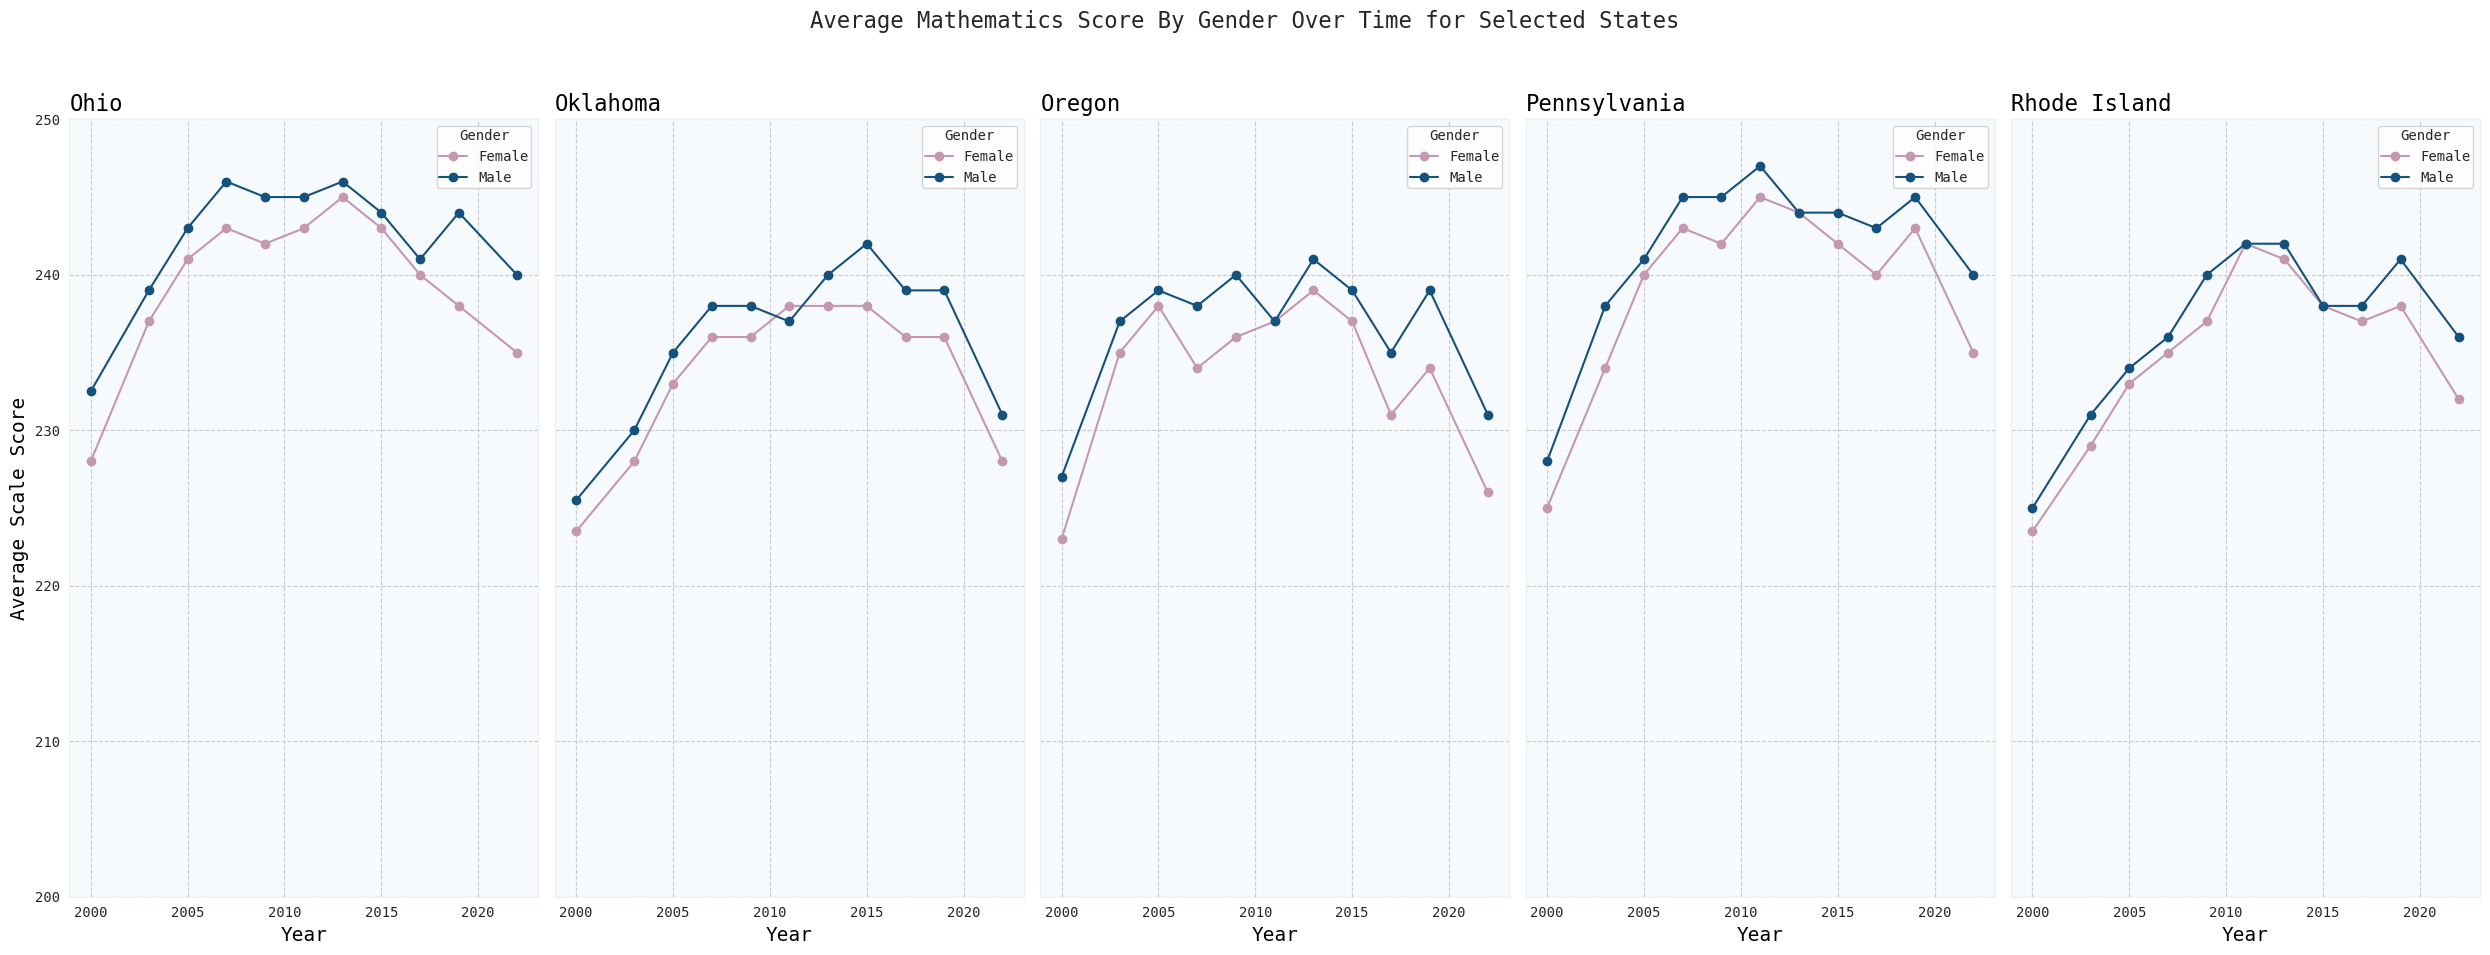

In [27]:
plot(states_8)

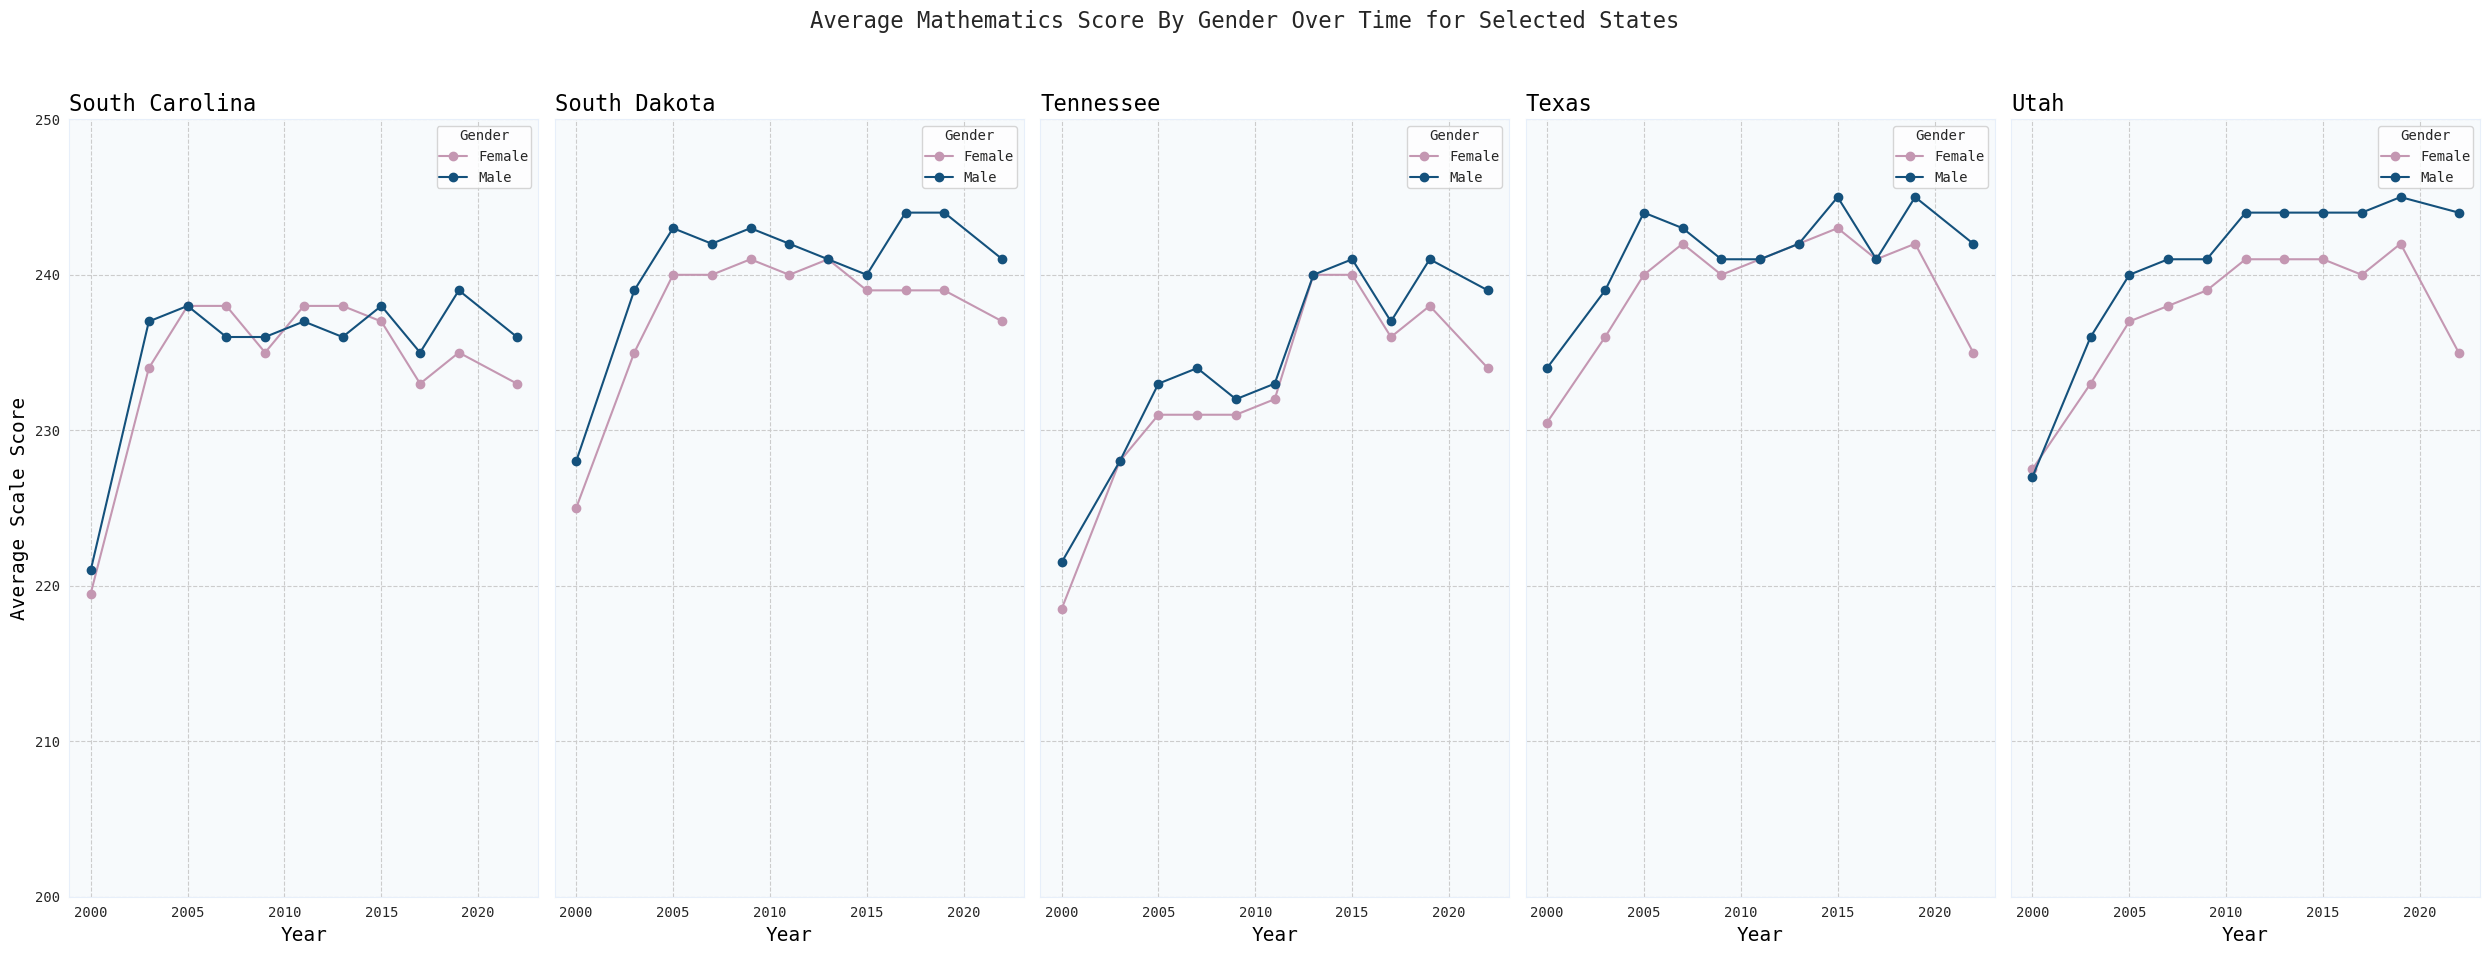

In [28]:
plot(states_9)

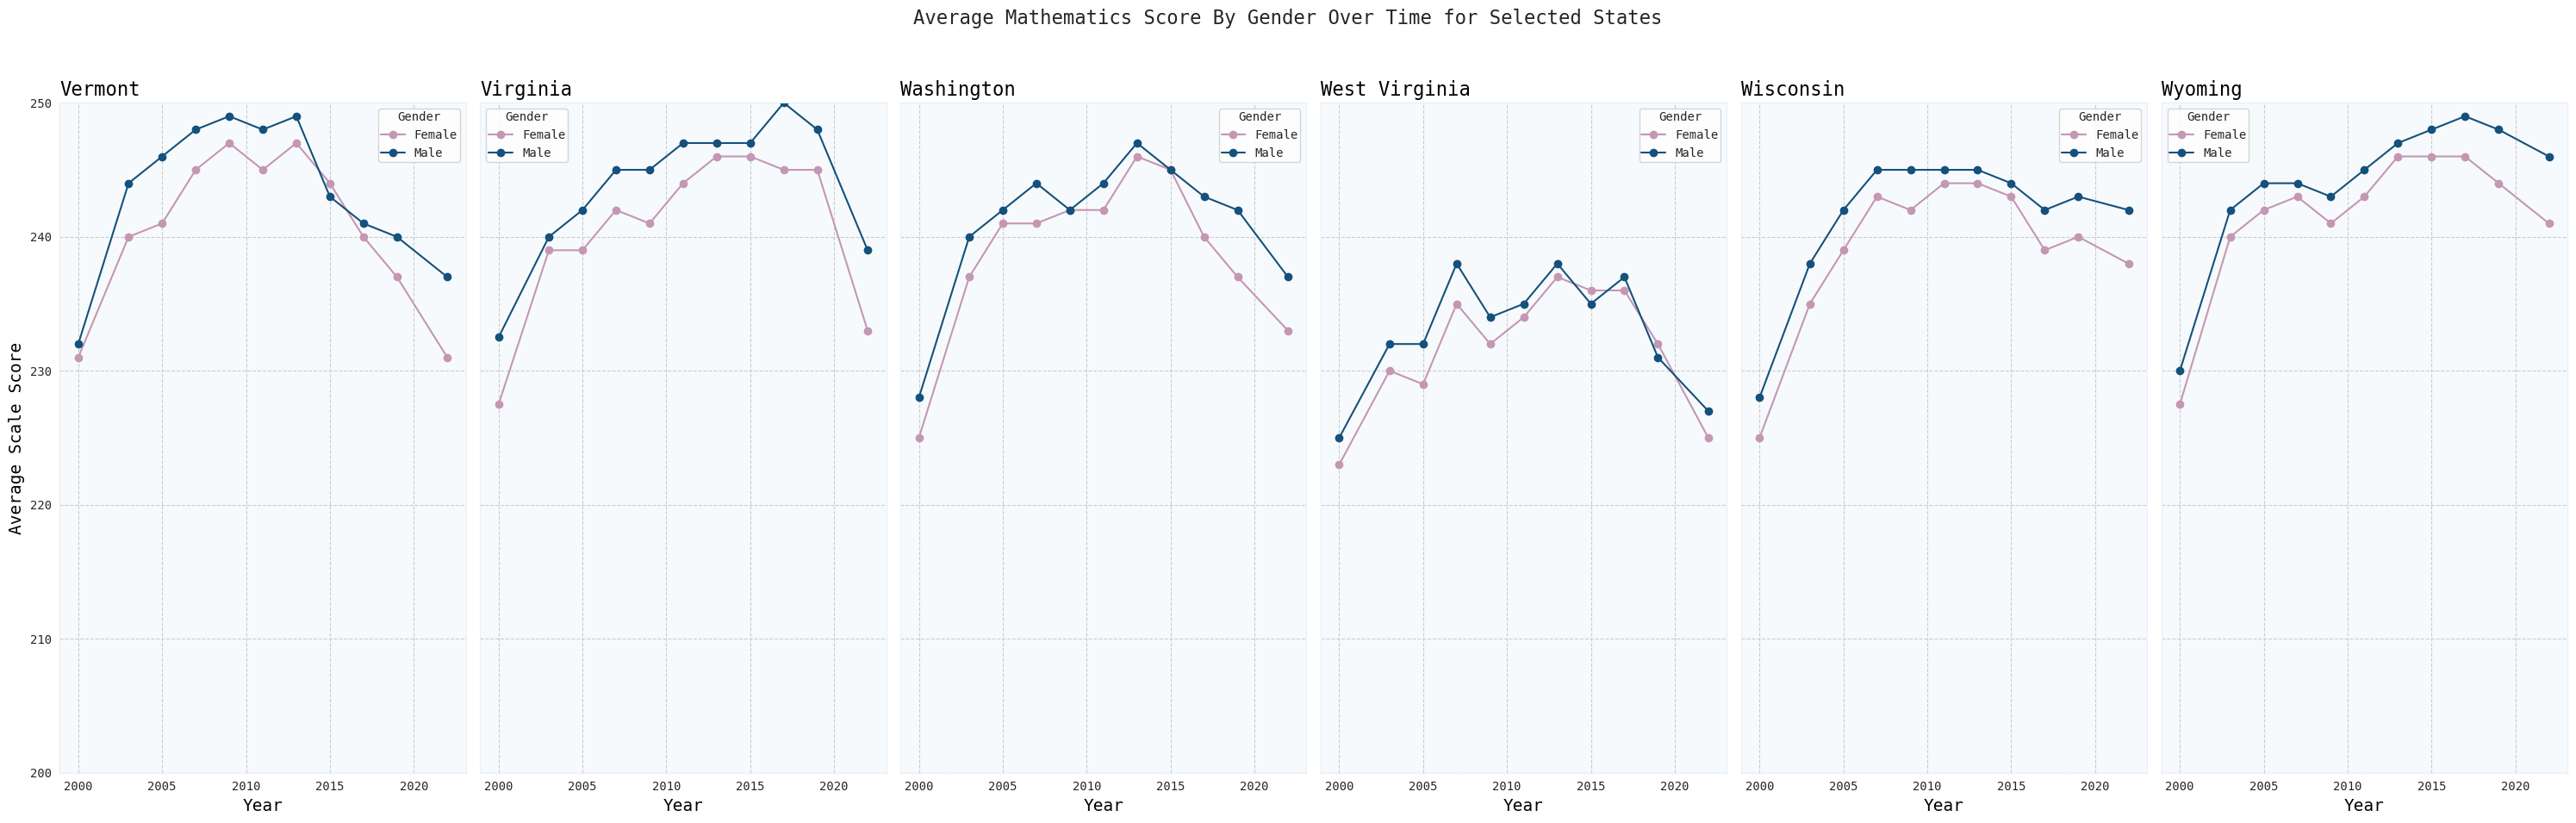

In [29]:
plot(states_10)